<a href="https://colab.research.google.com/github/DavidSenseman/BIO5853/blob/master/Lesson_02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO5853: Biostatistics**

## **Lesson_02_2: Theorectical Probability Distributions**

##### **Module II: Probability**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)

### Module II Material
* Part 2.1: Probability
* **Part 2.2: Theorectical Probability Distributions**
* Part 2.3: Sampling Distributions of the Mean

#### In this assignment you will learn about:

* Probability Distributions
* Binomial Distribution
* Poisson Distribution
* Normal Distribution

### Google CoLab Instructions

The following code will map your GDrive to ```/content/drive``` and print out your Google GMAIL address.

In [1]:
# YOU MUST RUN THIS CELL FIRST
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


# **Probability Distributions**

A **_Probability_Distribution_** is a mathematical function that describes the likelihood of different outcomes in a random experiment. It provides a comprehensive way to represent the probabilities of all possible values of a random variable.

#### **Types of Probability Distributions**

1. **Discrete Probability Distributions:** These are used for discrete random variables, which have countable outcomes.

Examples include:
- * **Binomial Distribution:** Describes the number of successes in a fixed number of independent Bernoulli trials.
- * **Poisson Distribution:** Describes the number of events occurring within a fixed interval of time or space.
2. **Continuous Probability Distributions:** These are used for continuous random variables, which have an infinite number of possible values.

Examples include:
- * **Normal Distribution:** Also known as the Gaussian distribution, it is symmetric and describes many natural phenomena.
- * **Exponential Distribution:** Describes the time between events in a Poisson process.

#### **Importance of Probability Distributions**
1. **Predicting Outcomes:** Probability distributions provide a framework for predicting the likelihood of different outcomes, which is essential for decision-making and risk assessment1.
2. **Data Analysis:** They are fundamental in statistical analysis, helping to summarize and interpret data. For example, the normal distribution is often used to model the distribution of continuous data1.
3. **Hypothesis Testing:** Many statistical tests rely on specific probability distributions to determine the significance of results. For instance, the t-distribution is used in t-tests to compare sample means2.
4. **Modeling Real-World Phenomena:** Probability distributions are used to model a wide range of real-world phenomena, from the distribution of heights in a population to the arrival times of buses1.
5. **Calculating Probabilities:** They allow for the calculation of probabilities for different events, which is crucial in fields like biology, ecology, and medicine.

--------------------------------

### **Random Variables**

Random variables are typically represented by uppercase letters such as $X$, $Y$, and $Z$. 

A **_discrete random variable_** is able to assume only a finite or countable number of outcomes. One example is marital status; an individual can be single, married, divorced, or widowed. Another example would be the number of ear infections an infant develops during his or her first year of life. 

A **_continuous random variable_**, such as weight or height, can take on any value within a specified interval or continuum; for continuous random variables, fractional values are possible. 

--------------------------------

### Example 1: Graph Probability Distribution

For Example 1, we will look at the example on page 159 in your textbook. This example starts as follows:

>For example, let X be a discrete random variable that represents the size of a household in the  United States in 2017; a household includes all people who occupy a housing unit as their usual  place of residence [158]. If a household contains only a single individual, then X = 1; if it contains  two people, then X = 2. To construct a probability distribution for X, we list each of the values x  that the random variable is able to assume, along with P(X = x) for each one. This has been done  in Table 7.1. The outcomes X = 7, X = 8, and so on for the countable integers have been grouped  together and called “7+ .” Note that we use an uppercase X to denote the random variable size of a  household, and a lowercase x to represent the outcome of a particular household, such as 1, 2, or 3. 

### Download Dataset

The first step is to download the file `household_size.csv` from the course file server using the Pandas function `pd.read_csv()` as show in the code cell below. As the file is read, the data is stored in a new DataFrame called `hsizeDF`. The code at the bottom prints out the contents of `hsizeDF`.

In [2]:
# Example 1A: Download dataset

import pandas as pd

# Read the datafile 
hsizeDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/household_size.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 8)
pd.set_option('display.max_columns', 3) 

# Display DataFrame
display(hsizeDF)

,x,prob,weights
1,1,0.280,280
2,2,0.345,345
3,3,0.152,152
4,4,0.129,129
5,5,0.058,58
6,6,0.022,22
7,7,0.014,14


If the code is correct you should see the following output:

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image23.png)

The output is data presented in **Table 7.1** in your textbook on page 160.


### Example 1B: Graph probability distribution 

The code in the cell below shows how to recreate **Figure 7.1** on page 161 of textbook using Python.

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image22.png)

In many cases, we are able to display a probability distribution using either a graph or a  mathematical formula. **Figure 7.1* for example, is a histogram of the probability distribution shown in **Table 7.1**. The area of each vertical bar represents $P(X = x)$, the probability associated with that particular outcome of the random variable. The total area represented by the bars of the histogram is equal to 1.  

_Code Description:_

To generate the plot that looks like **Figure 7.1** we need to use the bar chart function `plt.bar()` that comes with Matplotlib. The code chunk that actually plots the bar chart is as follows:

~~~text
# Plot bar
ax.bar(x, y, width=0.98, edgecolor="white",
       color='#294171',
       linewidth=0.7)
~~~

The remaining code adds different components to this basic bar chart (e.g. a title, x-axis label, etc).

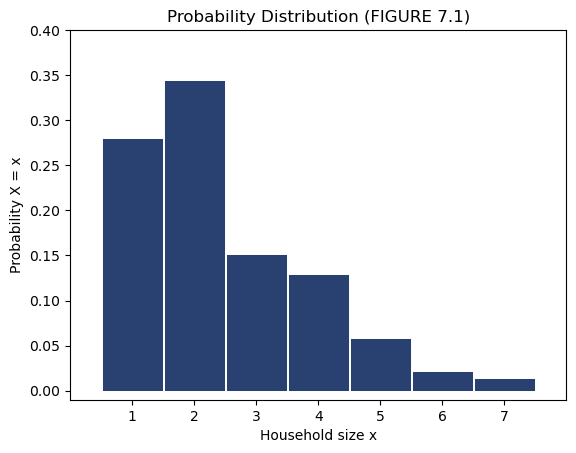

In [3]:
# Example 1B: Graph probability distribution (FIGURE 7.1)

import matplotlib.pyplot as plt

# Assign x- and y-values
x = hsizeDF.x
y = hsizeDF.prob     

# Prepare for plotting
fig, ax = plt.subplots()

# Plot bar
ax.bar(x, y, width=0.98, edgecolor="white",
       color='#294171',
       linewidth=0.7)

# Add labels and title
ax.set_xlabel("Household size x")
ax.set_ylabel("Probability X = x")
ax.set_title("Probability Distribution (FIGURE 7.1)")

# Set tick marks and axes
ax.set_xticks(x)
ax.set(xlim=(0, 8),
       ylim=(-0.010, 0.4))


# Show plot
plt.show()

If the code is correct, you should see the following histogram:  

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image21.png)

Tne figure legend in your textbook reads:
>Probability distribution of a random variable representing household size in the United States in 2017


### **Exercise 1: Graph Probability Distribution**

For **Exercise 1**, we will generate a graph showing cigarette smoking in the US, year-by-year, from 1900 until 2015.


### **Exercise 1A: Download Dataset**

In the cell below, write the code to download the file `cigarettes_per_year` from the course file server using the Pandas function `pd.read_csv()` as show in Example 1A. As the file is read, store in a new DataFrame called `cigDF`. Print out the contents of `cigDF` using the `display()` function.

In [4]:
# Insert your code for Exercise 1A here

import pandas as pd

# Read the datafile 
cigDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/cigarettes_per_year.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 8)
pd.set_option('display.max_columns', 3) 

# Display DataFrame
display(cigDF)

,year,number
1,1900,54
2,1910,151
3,1920,665
4,1930,1485
...,...,...
9,1980,3851
10,1990,2827
11,2000,1278
12,2015,1078


If your code is correct you should see the following output:

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image24.png)


### **Exercise 1B: Graph Probability Distribution** 

In the cell below, write the Python code to generate a probability distribution with `year` as the x-values and `number` as the y-values.

For the most part you can reuse the code in Example 1B with the following changes:

1. Change the x-axis label to "Year"
2. Change the y-axis label to "Number of Cigarettes Smoked in the US"
3. Change the title to "Probability Distribution"

Comment out the following code lines as shown:
~~~text
# Set tick marks and axes
#ax.set_xticks(x)
#ax.set(xlim=(0, 8),
#       ylim=(-0.010, 0.4))
~~~

This will allow the plotting function select the best values for these parameters.

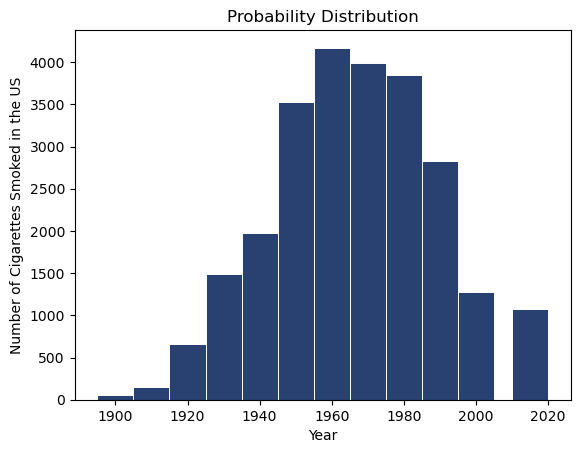

In [5]:
# Insert your code for Exercise 1B here

import matplotlib.pyplot as plt

# Assign x- and y-values
x = cigDF.year
y = cigDF.number     

# Prepare for plotting
fig, ax = plt.subplots()

# Plot bar
ax.bar(x, y, width=10, edgecolor="white",
       color='#294171',
       linewidth=0.7)

# Add labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Number of Cigarettes Smoked in the US")
ax.set_title("Probability Distribution")

# Set tick marks and axes
#ax.set_xticks(x)
#ax.set(xlim=(0, 8),
#       ylim=(-0.010, 0.4))

# Show plot
plt.show()

If the code is correct, you should see the following histogram:  

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image25.png)

## **Binomial Distribution**

The **_Binomial Distribution_** is a discrete probability distribution that models the number of successes in a fixed number of independent trials of a binary (yes/no) experiment. Each trial has two possible outcomes: _success_ (with probability $p$) and failure (with probability $1 - p$). The binomial distribution is defined by two parameters: ($n$) (the number of trials) and ($p$) (the probability of success in each trial).

The probability mass function (PMF) of the binomial distribution is given by:

$$ P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k} $$

where:

$\binom{n}{k}$ is the binomial coefficient, representing the number of ways to choose $k$ successes out of $n$ trials.
$k$ is the number of successes.

#### **Importance in Statistics**

1. **Modeling Binary Outcomes:** The binomial distribution is used to model situations where there are a fixed number of independent trials, each with the same probability of success. Examples include flipping a coin, quality control in manufacturing, and medical trials.
2. **Foundation for Other Distributions:** The binomial distribution is a foundation for other important distributions in statistics, such as the normal distribution (through the Central Limit Theorem) and the Poisson distribution (as an approximation for large $n$ and small ($p$).
3. **Hypothesis Testing:** It is used in hypothesis testing, particularly in tests of proportions. For example, it helps determine if the observed proportion of successes in a sample is significantly different from a hypothesized proportion.


### Example 2: Binomial Distribution

The code in the cell below shows the Python code to solve the example in your textbook starting on page 162. The example begins as follows:

>Suppose that we now randomly select two individuals from the population of adults in the United States. If we introduce a new random variable $X$ that represents the number of adults in the pair who are current smokers, then $X$ can take on three possible values: 0, 1, or 2. Either both of the individuals selected do not smoke, one smokes and the other does not, or both adults smoke. The smoking statuses of the two persons chosen are independent; therefore, we can apply the multiplication rule of probability for independent events to find the probability that X will take on a particular value....

In this example, a _success_ is defined as a person who smokes and a _failure_ as a person who doesn't smoke. 

Your textbook shows you the step-by-step method for calculating the probability of $X$, the number of smokers. The code in the cell below shows you how you can solve this problem using Python.

_Code Description:_

The code uses the following `for loop`:

~~~text
# Use for loop 
for k in range(0,numTrials):
    p_X = binom.pmf(k, n, p) # Compute probability
    print(f"The probability of getting exactly {k} successes in {n} trials is {p_X:.3f}")
    k +=1  # Increment k
~~~

The purpose of this `for loop` is to compute the different probabilities of successes, `p-X`, for different the three different outcomes (`k`). The variable `k` is initially equal to `0` when the loop starts, but its value is incremented by `1` at the end of each loop with this line of code:

~~~text
k +=1  # Increment k
~~~

The function that actually computes the binomial probability `p_X` is:

~~~text
p_X = binom.pmf(k, n, p) # Compute probability
~~~

In [6]:
# Example 2: Binomial distribution

from scipy.stats import binom

# Parameters
n = 2     # number of trials
p = 0.14  # probability of success

# Calculate number of trials
numTrials= n+1

# Initialize k
k = 0     # number of successes

# Use for loop 
for k in range(0,numTrials):
    p_X = binom.pmf(k, n, p) # Compute probability
    print(f"The probability of getting exactly {k} successes in {n} trials is {p_X:.3f}")
    k +=1  # Increment k

The probability of getting exactly 0 successes in 2 trials is 0.740
The probability of getting exactly 1 successes in 2 trials is 0.241
The probability of getting exactly 2 successes in 2 trials is 0.020


If the code is correct, you should see the following output:

~~~text
The probability of getting exactly 0 successes in 2 trials is 0.740
The probability of getting exactly 1 successes in 2 trials is 0.241
The probability of getting exactly 2 successes in 2 trials is 0.020
~~~

As you can see, the output from Example 2 is the same as shown in your textbook on page 162:

~~~text
Substituting in the value of p, we find that  
               P(X = 0) = (1 − p)*2 = (0.86)*2 = 0.740,  
               P(X = 1) = p(1 − p) + (1 − p)p = 2(0.14)(0.86) = 0.241,  
and  
               P(X = 2) = p*2 = (0.14)*2 = 0.019.  
~~~

### **Exercise 2: Binomial Distribution**

Using the code in Example 2 as a template, solve the example in your textbook on page 163 that starts as follows:

>Suppose we were to continue with the preceding example by randomly selecting three adults from the population instead of two. In this case, X would be a binomial random variable with parameters n = 3 and p = 0.14.  


In [7]:
# Insert your code for Exercise 2 here

from scipy.stats import binom

# Parameters
n = 3     # number of trials
p = 0.14  # probability of success

# Calculate number of trials
numTrials= n+1

# Initialize k
k = 0     # number of successes

# Use for loop 
for k in range(0,numTrials):
    p_X = binom.pmf(k, n, p) # Compute probability
    print(f"The probability of getting exactly {k} successes in {n} trials is {p_X:.3f}")
    k +=1  # Increment k

The probability of getting exactly 0 successes in 3 trials is 0.636
The probability of getting exactly 1 successes in 3 trials is 0.311
The probability of getting exactly 2 successes in 3 trials is 0.051
The probability of getting exactly 3 successes in 3 trials is 0.003


If your code is correct, you should see the following output:

~~~text
The probability of getting exactly 0 successes in 3 trials is 0.636
The probability of getting exactly 1 successes in 3 trials is 0.311
The probability of getting exactly 2 successes in 3 trials is 0.051
The probability of getting exactly 3 successes in 3 trials is 0.003
~~~

These are the same results are shown on page 163:

~~~text
Substituting in the value of p,  
                  P(X = 0) = (1 − p)*3  = (0.86) 3 = 0.636,  
                  P(X = 1) = p(1 − p)*2 + p(1 − p)*2 + p(1 − p)*2  = 3(0.14)(0.86)*2 = 0.311,  
                  P(X = 2) = p*2 (1 − p) + p 2 (1 − p) + p 2 (1 − p)  
                           = 3(0.14)*2 (0.86) = 0.050,  
and  
                  P(X = 3) = p*3 = (0.14)*3 = 0.003.
                  
These equations describe the probability distribution of X. 
~~~

### Example 3: Graph Binomial Distribution

The code in the cell below shows how to recreate **FIGURE 7.2** from your textbook. 

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image01.png)

_Code Description:_

The code uses the Numpy function `np.random.binomial()` to generate 10000 random numbers (`size`) from a binomial distribution specified by the parameters. `n`, `p`.

~~~text
# Generate binomial distribution
x_dat = np.random.binomial(n, p, size)
~~~

The numbers are then plotted using Matplotlib.pyplot histogram function `hist()`:

~~~text
# Plot the results
ax.hist(x_dat, bins=range(n+2), 
         color='#294171', 
         edgecolor='white', 
         align='left',
         density=True)
~~~

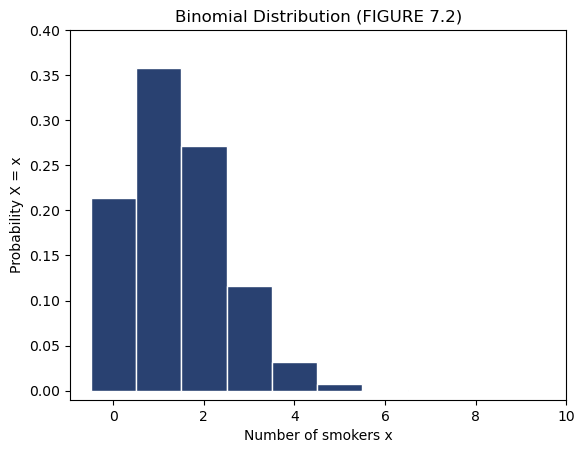

In [8]:
# Example 3: Graph binomial distribution

import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10  # number of trials
p = 0.14  # probability of success
size = 10000  # number of samples

# Generate binomial distribution
x_dat = np.random.binomial(n, p, size)

# Prepare for plotting
fig, ax = plt.subplots()

# Plot the results
ax.hist(x_dat, bins=range(n+2), 
         color='#294171', 
         edgecolor='white', 
         align='left',
         density=True)

# Add labels and title
ax.set_xlabel("Number of smokers x")
ax.set_ylabel("Probability X = x")
ax.set_title('Binomial Distribution (FIGURE 7.2)')

# Set the x and y limits
ax.set(xlim=(-0.95, 10),
       ylim=(-0.010, 0.4))

# Show plot
plt.show()

If the code is correct, you should see the following histogram:  

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image02.png)

### **Exercise 3A: Graph Binomial Distribution**

In the cell below, write the code to recreate **FIGURE 7.3** from your textbook. 

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image03.png)


You can reuse the code in Example 3 but you will need to make 3 small code changes.

1. Increase the `xlim` from (-0.95, 10) to (-0.95, 11)
2. Change the `xlabel` to be ("x")
3. Change the title to read 'Binomial Distribution (FIGURE 7.3)'

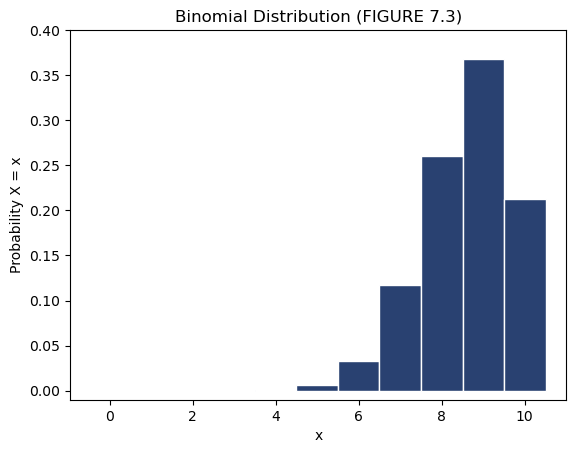

In [9]:
# Insert your code for Exercise 3 here

import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10  # number of trials
p = 0.86  # probability of success
size = 10000  # number of samples

# Generate binomial distribution
x_dat = np.random.binomial(n, p, size)

# Prepare for plotting
fig, ax = plt.subplots()

# Plot the results
ax.hist(x_dat, bins=range(n+2), 
         color='#294171', 
         edgecolor='white', 
         align='left',
         density=True)

# Add labels and title
ax.set_xlabel("x")
ax.set_ylabel("Probability X = x")
ax.set_title('Binomial Distribution (FIGURE 7.3)')

# Set the x and y limits
ax.set(xlim=(-0.95, 11),
       ylim=(-0.010, 0.4))

# Show plot
plt.show()

If your code is correct, you should see the following histogram:  

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image04.png)

### **Exercise 3B: Graph Binomial Distribution**

In the cell below, write the code to recreate **FIGURE 7.4** from your textbook. 

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image05.png)


You can reuse the code from your Exercise 3 but you will need to make 2 small code changes.

1. Increase the `ylim` from (-0.010, 0.4) to (-0.010, 0.3))
2. Change the title to read 'Binomial Distribution (FIGURE 7.4)'

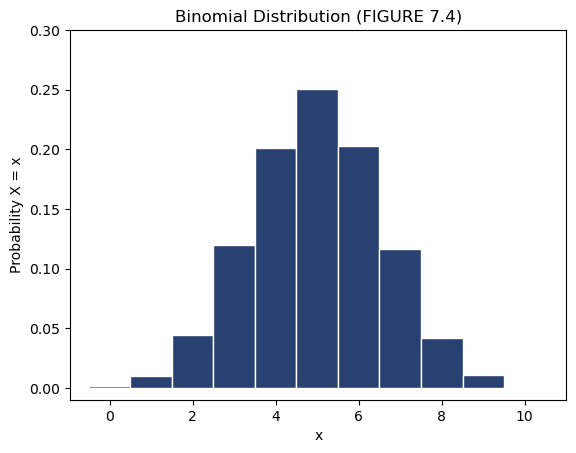

In [10]:
# Insert your code for Exercise 3B here

import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10  # number of trials
p = 0.50  # probability of success
size = 10000  # number of samples

# Generate binomial distribution
x_dat = np.random.binomial(n, p, size)

# Prepare for plotting
fig, ax = plt.subplots()

# Plot the results
ax.hist(x_dat, bins=range(n+2), 
         color='#294171', 
         edgecolor='white', 
         align='left',
         density=True)

# Add labels and title
ax.set_xlabel("x")
ax.set_ylabel("Probability X = x")
ax.set_title('Binomial Distribution (FIGURE 7.4)')

# Set the x and y limits
ax.set(xlim=(-0.95, 11),
       ylim=(-0.010, 0.3))

# Show plot
plt.show()

If your code is correct, you should see the following histogram:  

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image06.png)

## **Poisson Distribution**

The **_Poisson Distribution_** is a discrete probability distribution that models the number of times an event occurs within a fixed interval of time or space. It is characterized by the parameter  $\lambda$ (lambda), which represents the average number of events in the given interval. The probability mass function ($PMF$) of the Poisson distribution is given by:

$$ P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!} $$
​
where:

- $P(X = k)$ is the probability of observing $k$ events in the interval.
- $\lambda$ is the average number of events.
- $e$ is the base of the natural logarithm.
- $k$ is the number of events.
- $k!$ is the factorial of $k$.

#### **Importance in Statistics**

1. **Modeling Rare Events:** The Poisson distribution is particularly useful for modeling rare events. Examples include the number of phone calls received by a call center in an hour, the number of decay events per unit time from a radioactive source, or the number of accidents at a traffic intersection in a day1.
2. **Simplicity and Flexibility:** It requires only one parameter ($\lambda$), making it simple to use. Despite its simplicity, it can model a wide range of phenomena where events occur independently and at a constant average rate2.
3. **Applications in Various Fields:** The Poisson distribution is widely used in fields such as biology (e.g., modeling the number of mutations in a DNA sequence), finance (e.g., modeling the number of defaults in a portfolio of loans), and insurance (e.g., modeling the number of claims received in a period)3.
4. **Foundation for Other Models:** It serves as a basis for more complex models, such as the Poisson regression, which is used to model count data and contingency tables. It is also related to the exponential and gamma distributions, which model the time between events in a Poisson process2.

### Example 4: Poisson Distribution

The code in the cell below shows how to use Python to solve the example shown on page 168 in your textbook. The example starts as follows:

>Consider a random variable X that represents the number of occurrences of some event of interest  over a given interval. Since X is a count, it is theoretically able to assume any integer value between  0 and infinity. Let λ (the Greek letter lambda) be a constant that denotes the average number of  occurrences of the event in an interval. If the probability that X assumes the value x is...

_Code Description:_

As in Example 3. the code below uses a simple `for loop` to print out the probability of $X$ for different number of events `k`. The number of events is initially set to `0` but is incremented by `1` during each pass through the loop. The total number of passes thorough the loop is determined by the variable `numTrials`. In this example `numTrials` was set to `7` since we needed to calculate `7` different occurrences (i.e. 0 through 6).

In [11]:
# Example 4: Poisson distribution

from scipy.stats import poisson

# Parameters
lambda_val = 2.4  # average number of events
k = 0  # number of events
numTrials=7

# Use for loop 
for k in range(0,numTrials):
    p_X = poisson.pmf(k, lambda_val)  # Compute probability
    print(f"The probability of observing exactly {k} events is {p_X:.3f}")
    k +=1 # Increment k

The probability of observing exactly 0 events is 0.091
The probability of observing exactly 1 events is 0.218
The probability of observing exactly 2 events is 0.261
The probability of observing exactly 3 events is 0.209
The probability of observing exactly 4 events is 0.125
The probability of observing exactly 5 events is 0.060
The probability of observing exactly 6 events is 0.024


If the code is correct, you should see the following output:

~~~text
The probability of observing exactly 0 events is 0.091
The probability of observing exactly 1 events is 0.218
The probability of observing exactly 2 events is 0.261
The probability of observing exactly 3 events is 0.209
The probability of observing exactly 4 events is 0.125
The probability of observing exactly 5 events is 0.060
The probability of observing exactly 6 events is 0.024
~~~

These are the same results as shown in your textbook on page 169.

$$ P(X = 0) = \frac{e^{-2.4}(2.4)^0}{0!} = 0.091 $$
$$ P(X = 0) = \frac{e^{-2.4}(2.4)^1}{0!} = 0.218 $$
$$ P(X = 0) = \frac{e^{-2.4}(2.4)^2}{0!} = 0.261 $$
$$ P(X = 0) = \frac{e^{-2.4}(2.4)^3}{0!} = 0.209 $$
$$ P(X = 0) = \frac{e^{-2.4}(2.4)^4}{0!} = 0.125 $$
$$ P(X = 0) = \frac{e^{-2.4}(2.4)^5}{0!} = 0.060 $$
$$ P(X = 0) = \frac{e^{-2.4}(2.4)^6}{0!} = 0.024 $$

### **Exercise 4: Poisson Distribution**

In the cell below, write the Python to solve the following problem: 

>Imagine a hospital emergency room that receives an average of 5 patient admissions per hour. We want to find the probability of receiving exactly 8 admissions in a given hour.

_Code Description:_

Since you are being asked to compute the probability for a single condition (i.e. `exactly 8 admissions`) you _don't_ need to use a `for loop`. In fact, if you use a `for loop`, this exercise will be marked as incorrect!


In [12]:
# Insert your code for Exercise 4 here

from scipy.stats import poisson

# Parameters
lambda_val = 5  # average number of events
k = 8  # number of events

# Compute probability
p_X = poisson.pmf(k, lambda_val)  # Compute probability

# Print results
print(f"The probability of observing exactly {k} events is {p_X:.3f}")

The probability of observing exactly 8 events is 0.065


If your code is correct, you should see the following output:

~~~text
The probability of observing exactly 8 events is 0.065
~~~

### Example 5: Plot Poisson Distribution

The code in the cell below shows how to recreate **FIGURE 7.6** from page 171 in your textbook

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image07.png)

_Code Description:_

The code uses the Numpy function `np.random.binomial()` to generate 10000 random numbers (`size`) from a binomial distribution specified by the parameters. `n`, `p`.

~~~text
# Generate binomial distribution
x_dat = np.random.binomial(n, p, size)
~~~

The numbers are then plotted using Matplotlib.pyplot histogram function `hist()`:

~~~text
# Plot the results
ax.hist(x_dat, bins=range(n+2), 
         color='#294171', 
         edgecolor='white', 
         align='left',
         density=True)

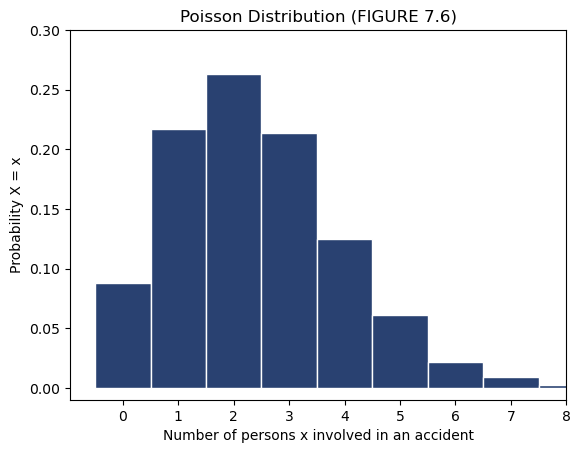

In [13]:
# Example 4: Graph poisson distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters
lambda_val = 2.4  # average number of events
size = 10000  # number of samples

# Generate Poisson distribution
x_dat = poisson.rvs(mu=lambda_val, size=size)

# Prepare for plotting
fig, ax = plt.subplots()

# Plot the results
ax.hist(x_dat, bins=range(n+2), 
         color='#294171', 
         edgecolor='white', 
         align='left',
         density=True)

# Add labels and title
ax.set_xlabel("Number of persons x involved in an accident")
ax.set_ylabel("Probability X = x")
ax.set_title('Poisson Distribution (FIGURE 7.6)')

# Set the x and y limits
ax.set(xlim=(-0.95, 8),
       ylim=(-0.010, 0.3))

# Show plot
plt.show()

If the code is correct, you should see the following histogram:  

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image08.png)

### **Exercise 5: Plot Poisson Distribution**

In the cell below, write the Python code to recreate **FIGURE 7.6** from page 171 in your textbook

_Code Description:_

The code uses the Numpy function `np.random.binomial()` to generate 10000 random numbers (`size`) from a binomial distribution specified by the parameters. `n`, `p`.

~~~text
# Generate binomial distribution
x_dat = np.random.binomial(n, p, size)
~~~

The numbers are then plotted using Matplotlib.pyplot histogram function `hist()`:

~~~text
# Plot the results
ax.hist(x_dat, bins=range(n+2), 
         color='#294171', 
         edgecolor='white', 
         align='left',
         density=True)

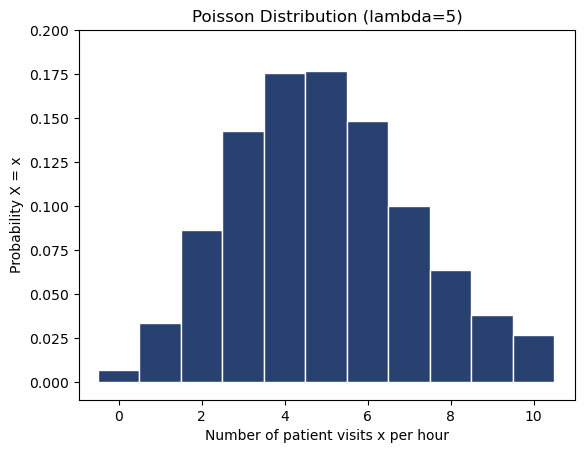

In [14]:
# Example 4: Graph poisson distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters
lambda_val = 5  # average number of events
size = 10000  # number of samples

# Generate Poisson distribution
x_dat = poisson.rvs(mu=lambda_val, size=size)

# Prepare for plotting
fig, ax = plt.subplots()

# Plot the results
ax.hist(x_dat, bins=range(n+2), 
         color='#294171', 
         edgecolor='white', 
         align='left',
         density=True)

# Add labels and title
ax.set_xlabel("Number of patient visits x per hour")
ax.set_ylabel("Probability X = x")
ax.set_title('Poisson Distribution (lambda=5)')

# Set the x and y limits
ax.set(xlim=(-0.95, 11),
       ylim=(-0.010, 0.2))

# Show plot
plt.show()

If your code is correct, you should see the following histogram:  

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image09.png)

### Example 5: Probability Distribution of a Binomial Random Variable

The code in the cell below shows how to recreate **Figure 7.8** on page 172 in your textbook.

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image12.png)


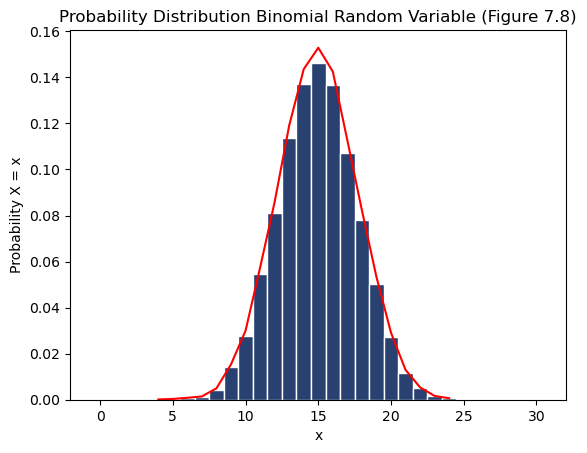

In [15]:
# Example 5: Graph poisson distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import gaussian_kde
from scipy.interpolate import make_interp_spline

# Parameters
n = 30  # number of trials
p = 0.5  # probability of success
size = 10000  # number of samples

# Set the seed
np.random.seed(42) #43

# Generate Poisson distribution
x_dat = np.random.binomial(n, p, size)

# Prepare for plotting
fig, ax = plt.subplots()

# Plot the results
ax.hist(x_dat, bins=range(n+2), 
         color='#294171', 
         edgecolor='white', 
         align='left',
         density=True)

# Calculate the KDE
kde = gaussian_kde(x_dat)
x = np.linspace(min(x_dat), max(x_dat), size)
y = kde(x)

# Create a smooth spline curve
X_Y_Spline = make_interp_spline(x, y)

# Generate new x values for a smooth curve
X_ = np.linspace(x.min(), x.max(), 21)
Y_ = X_Y_Spline(X_)

# Plot the KDE line
plt.plot(X_, Y_, color='red')

# Add labels and title
ax.set_xlabel("x")
ax.set_ylabel("Probability X = x")
ax.set_title('Probability Distribution Binomial Random Variable (Figure 7.8)')

# Set the x and y limits
#ax.set(xlim=(-0.95, 11),
 #      ylim=(-0.010, 0.2))

# Show plot
plt.show()

If the code is correct, you should see something _similar_ to the following histogram:  

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image10.png)

The figure legend in your textbook reads:

>Probability distribution of a binomial random variable with parameters _n_ = 30 and _p_ = 0.50 

## **Normal Distribution**

A **_Normal Distribution_**, also known as a _Gaussian Distribution_, is a continuous probability distribution that is symmetrical around its mean. It is characterized by its bell-shaped curve, where most of the observations cluster around the central peak, and the probabilities for values taper off equally in both directions as you move away from the mean.

#### **Key Characteristics:**

1. **Symmetry:** The distribution is perfectly symmetrical around the mean.
2. **Mean, Median, and Mode:** In a normal distribution, these three measures of central tendency are all equal.
3. **Bell-shaped Curve:** The shape of the distribution is bell-shaped, with the highest point at the mean.
4. **Empirical Rule:** Approximately 68% of the data falls within one standard deviation of the mean, 95% within two standard deviations, and 99.7% within three standard deviations.


#### **Importance:**
* **Natural Phenomena:** Many natural phenomena follow a normal distribution, such as heights, blood pressure, and measurement errors.
* **Central Limit Theorem:** This theorem states that the sum of a large number of independent and identically distributed random variables will be approximately normally distributed, regardless of the original distribution of the variables.
* **Statistical Inference:** Many statistical tests and methods, such as hypothesis testing and confidence intervals, are based on the assumption of normality.
* **Predictive Modeling:** Normal distribution is used in various predictive models and algorithms in machine learning and data science.
  
#### **Formula**

The most common continuous distribution is the normal distribution, also known as the Gaussian distribution, or the bell-shaped curve. Its shape is that of a binomial distribution for which $p$ is constant but $n$ approaches infinity, or a Poisson distribution where $λ$  approaches infinity. Its probability density is given by the equation

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2} $$

where $−∞ < x < ∞$. The symbol $π$ ($pi$) represents a constant approximated by 3.14159. The $e$ is the same constant we previously encountered in the formula for a Poisson probability, the base of the natural logarithms. The normal curve is unimodal and symmetric about its mean $µ$ (the Greek  letter mu); in this special case, the mean, median, and mode of the distribution are all identical.  The standard deviation, represented by $σ$ (sigma), specifies the amount of variability around the  mean. Together, the two parameters $µ$ and $σ$ completely define a normal curve. If we know these two values, we know exactly what the probability density looks like.


### **Example 6: Plot Standard Normal Curve**

The code in the cell below shows how to recreate **Figure 7.9** on page 174 in your textbook.

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image11.png)

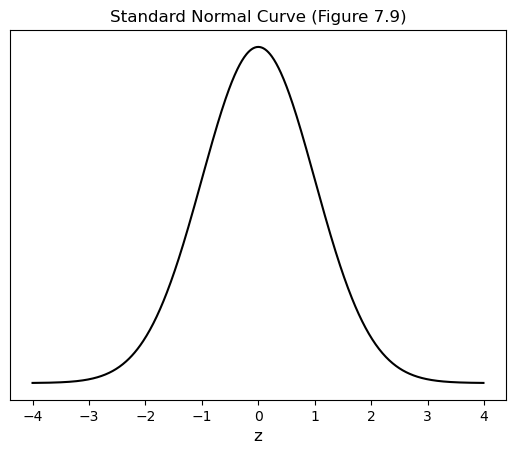

In [16]:
# Example 6 - Plot Standard Normal Curve

from scipy.stats import norm      # normal distribution

# Define parameters for the normal distribution
mu = 0        # mean
sd = 1         # standard deviation
size = 500     # number of trials

# Generate x-values between -4 and 4 with .01 steps. 
x_dat = np.arange(-4.0, 4.0, 0.01) 

# Compute the y-value for each x-value from normal distribution
y_dat = norm.pdf(x_dat, mu, sd)

# Plot the normal distribution
plt.plot(x_dat, y_dat ,'k')   # the augument 'k' makes the color black

# Ensure y-axis is visible
plt.gca().yaxis.set_visible(False)

# Label plot
plt.title('Standard Normal Curve (Figure 7.9)', fontsize='12')   # Title
plt.xlabel('z', fontsize='12')   # X-axis
plt.ylabel('', fontsize='12')   # Y-axis

# Show plot
plt.show()

If the code is correct, you should see the following curve:  

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image13.png)

The figure legend in your textbook reads as follows:

>The standard normal distribution with parameters _µ_ = 0 and _σ_ = 1 

### Example 7: Plot Normal Curve with Area

The code in the cell below shows how to recreate **Figure 7.10** on page 174 in your textbook.

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image14.png)

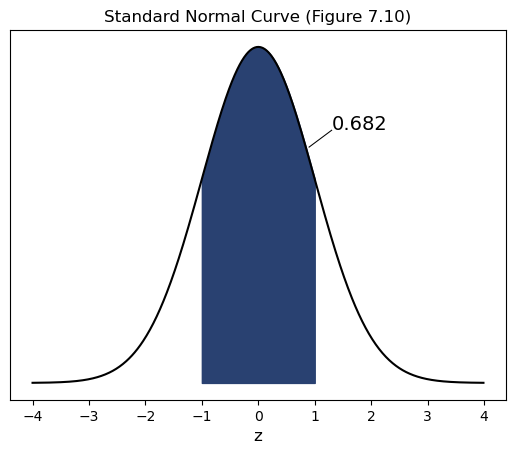

In [17]:
# Example 7: Plot Normal Curve with Area

from scipy.stats import norm      # normal distribution

# Define parameters for the normal distribution
mu = 0        # mean
sd = 1         # standard deviation
size = 500     # number of trials
low_val = -1.0
high_val = 1.0

# Generate x-values between -4 and 4 with .01 steps. 
x_dat = np.arange(-4.0, 4.0, 0.01) 

# Compute the y-value for each x-value from normal distribution
y_dat = norm.pdf(x_dat, mu, sd)

# Plot the normal distribution
plt.plot(x_dat, y_dat ,'k')   # the augument 'k' makes the color black

# Label plot
plt.title('Standard Normal Curve (Figure 7.10)', fontsize='12')   # Title
plt.xlabel('z', fontsize='12')   # X-axis
plt.ylabel('', fontsize='12')   # Y-axis

# Fill the area under the curve between bmi limits
shade_x = np.linspace(low_val, high_val, 100)  # set x area
shade_y = norm.pdf(shade_x, mu, sd)      # set y area
plt.fill_between(shade_x, shade_y, color='#294171', alpha=1.0)  # fill areas

# Ensure y-axis is visible
plt.gca().yaxis.set_visible(False)

# Plot text
plt.text(1.30, 0.30, '0.682', fontsize=14)   # mu at bottom

# Plot line
x_line=[0.90, 1.30]
y_line=[0.28, 0.30]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Show plot
plt.show()

If the code is correct, you should see the following curve:  

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image15.png)

The figure legend in your textbook reads as follows:

>The standard normal curve, area between _z_ = −1.00 and _z_ = 1.00  

### **Exercise 7: Plot Normal Curve with Area**

In the cell below write the code to recreate **Figure 7.11** on page 175 in your textbook.

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image16.png)

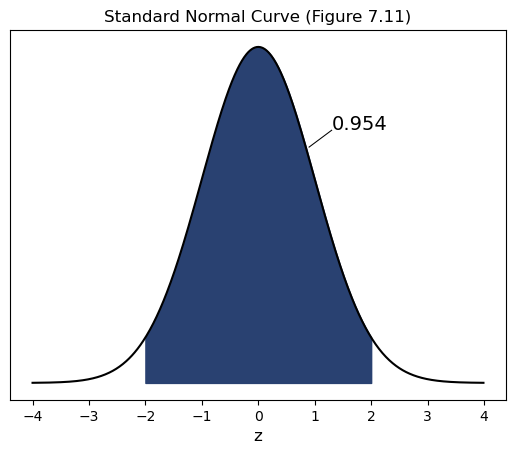

In [18]:
# Insert your code for Exercise 7 here

from scipy.stats import norm      # normal distribution

# Define parameters for the normal distribution
mu = 0        # mean
sd = 1         # standard deviation
size = 500     # number of trials
low_val = -2.0
high_val = 2.0

# Generate x-values between -4 and 4 with .01 steps. 
x_dat = np.arange(-4.0, 4.0, 0.01) 

# Compute the y-value for each x-value from normal distribution
y_dat = norm.pdf(x_dat, mu, sd)

# Plot the normal distribution
plt.plot(x_dat, y_dat ,'k')   # the augument 'k' makes the color black

# Label plot
plt.title('Standard Normal Curve (Figure 7.11)', fontsize='12')   # Title
plt.xlabel('z', fontsize='12')   # X-axis
plt.ylabel('', fontsize='12')   # Y-axis

# Fill the area under the curve between bmi limits
shade_x = np.linspace(low_val, high_val, 100)  # set x area
shade_y = norm.pdf(shade_x, mu, sd)      # set y area
plt.fill_between(shade_x, shade_y, color='#294171', alpha=1.0)  # fill areas

# Ensure y-axis is visible
plt.gca().yaxis.set_visible(False)

# Plot text
plt.text(1.30, 0.30, '0.954', fontsize=14)   # mu at bottom

# Plot line
x_line=[0.90, 1.30]
y_line=[0.28, 0.30]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Show plot
plt.show()

If your code is correct, you should see the following curve:  

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image17.png)

The figure legend in your textbook reads as follows:

>The standard normal curve, area between _z_ = −2.00 and _z_ = 2.00  

### Example 8: Plot Normal Curve with Area

The code in the cell below shows how to recreate **Figure 7.12** on page 176 in your textbook.

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image18.png)

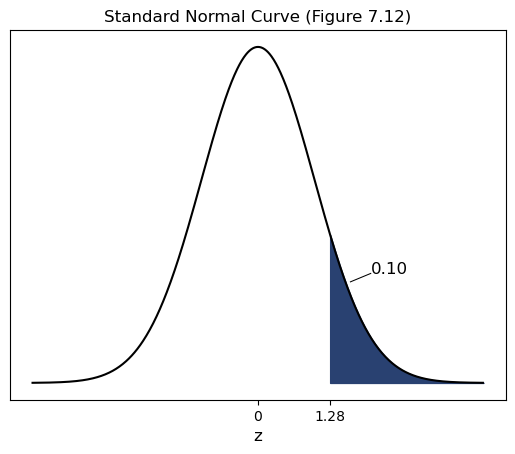

In [19]:
# Example 6: Plot Normal Curve with area 

from scipy.stats import norm      # normal distribution

# Define parameters for the normal distribution
mu = 0        # mean
sd = 1         # standard deviation
size = 500     # number of trials
low_val = 1.28
high_val = 4.0

# Generate x-values between -4 and 4 with .01 steps. 
x_dat = np.arange(-4.0, 4.0, 0.01) 

# Compute the y-value for each x-value from normal distribution
y_dat = norm.pdf(x_dat, mu, sd)

# Create a plot
fig, ax = plt.subplots()
# ax.plot(x, y)

# Plot the normal distribution
ax.plot(x_dat, y_dat ,'k')   # the augument 'k' makes the color black

# Label plot
plt.title('Standard Normal Curve (Figure 7.12)', fontsize='12')   # Title
plt.xlabel('z', fontsize='12')   # X-axis
plt.ylabel('', fontsize='12')   # Y-axis

# Fill the area under the curve between bmi limits
shade_x = np.linspace(low_val, high_val, 100)  # set x area
shade_y = norm.pdf(shade_x, mu, sd)      # set y area
plt.fill_between(shade_x, shade_y, color='#294171', alpha=1.0)  # fill areas

# Ensure y-axis is visible
plt.gca().yaxis.set_visible(False)

# Specify x-ticks
ax.set_xticks([0, 1.28])
ax.set_xticklabels(['0', '1.28'])

# Plot text
plt.text(2, 0.13, '0.10', fontsize=12)   # mu at bottom

# Plot line
x_line=[1.64, 2]
y_line=[0.12, 0.13]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Show plot
plt.show()

If the code is correct, you should see the following curve:  

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image19.png)

The figure legend in your textbook reads as follows:

>The standard normal curve, area to the right of _z_=1.28  

### **Exercise 8: Plot Normal Curve with Area**

In the cell below, write the Python code to recreate **Figure 7.12** on page 176 in your textbook, except fill in the area to the left of _z_= -1.28.

_Code Hints:_

1. You will have to change the values for `low_val` and `high_val`. Look at the graph in Example 8 to figure what values you need to use.
2. You will need to change the plot ticks to read as follows:
~~~text
ax.set_xticks([-1.28, 0])
ax.set_xticklabels(['-1.28', '0'])
~~~
4. You will have to change the plot text to read as follows:
~~~text
plt.text(-2.7, 0.13, '0.10', fontsize=12)   # mu at bottom
~~~
3. You will have to change the plot line code to read as follows:
~~~text
x_line=[-2.0, -1.7]
y_line=[0.13, 0.11]
~~~

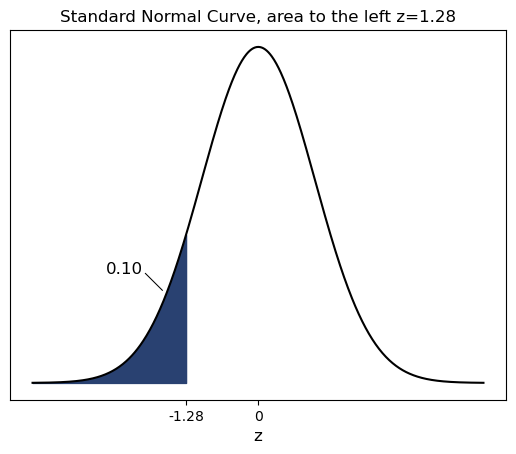

In [20]:
# Insert your code for Exercise 8 here

from scipy.stats import norm      # normal distribution

# Define parameters for the normal distribution
mu = 0        # mean
sd = 1         # standard deviation
size = 500     # number of trials
low_val = -1.28
high_val = -4.0

# Generate x-values between -4 and 4 with .01 steps. 
x_dat = np.arange(-4.0, 4.0, 0.01) 

# Compute the y-value for each x-value from normal distribution
y_dat = norm.pdf(x_dat, mu, sd)

# Create a plot
fig, ax = plt.subplots()
# ax.plot(x, y)

# Plot the normal distribution
ax.plot(x_dat, y_dat ,'k')   # the augument 'k' makes the color black

# Label plot
plt.title('Standard Normal Curve, area to the left z=1.28', fontsize='12')   # Title
plt.xlabel('z', fontsize='12')   # X-axis
plt.ylabel('', fontsize='12')   # Y-axis

# Fill the area under the curve between bmi limits
shade_x = np.linspace(low_val, high_val, 100)  # set x area
shade_y = norm.pdf(shade_x, mu, sd)      # set y area
plt.fill_between(shade_x, shade_y, color='#294171', alpha=1.0)  # fill areas

# Ensure y-axis is visible
plt.gca().yaxis.set_visible(False)

# Specify x-ticks
ax.set_xticks([-1.28, 0])
ax.set_xticklabels(['-1.28', '0'])

# Plot text
plt.text(-2.7, 0.13, '0.10', fontsize=12)   # mu at bottom

# Plot line
x_line=[-2.0, -1.7]
y_line=[0.13, 0.11]
plt.plot(x_line, y_line, color='k', linestyle='solid', linewidth=0.75)

# Show plot
plt.show()

If your code is correct, you should see the following curve:  

![___](https://biologicslab.co/BIO5853/images/module_02/lesson_02_2_image20.png)

## **Lesson Turn-in**

When you have run all of the code cells. print a PDF of your Colab notebook and upload it to Canvas for grading. 